In [48]:
!git clone https://github.com/ismaelclebson/desafio-fadesp-processo-seletivo

fatal: destination path 'desafio-fadesp-processo-seletivo' already exists and is not an empty directory.


In [49]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('data/dataset_desafio_fadesp.csv', encoding='latin1')

In [51]:
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [52]:
data['Sales'] = pd.to_numeric(data['Sales'])
data['Discount'] = pd.to_numeric(data['Discount'])
data['Profit'] = pd.to_numeric(data['Profit'])
data['Shipping Cost'] = pd.to_numeric(data['Shipping Cost'])
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='mixed')

In [53]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [54]:
#Verificando se existem dados nulos no dataset

data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [55]:
#Verificando se existem dados duplicados no dataset

data.duplicated().sum()

0

In [56]:
#Nesta análise de limpeza dos dados, não notei casos que houvessem a necessidade de realizar procedimentos de ajustes como:
#substituir os dados faltantes por zero, pela média e em alguns a exclusão se não houver impacto na base de dados;
#Além disso, percebi que o cep mostra muitos resultados não preenchidos, porém como possuem cidade, estado e pais, talvez o cep não tenha tanto impacto nas análises.

In [57]:
data = data.drop(['Postal Code'], axis=1)

In [58]:
#Cria uma entidade com a diferença de dias entre a data da ordem e a data de entrega (tempo de entrega)
data['Diff_Order_Ship_Date'] = (data['Ship Date'] - data['Order Date']).dt.days

<Axes: title={'center': 'Os 10 produtos mais vendidos'}, xlabel='Product Name', ylabel='Total de Vendas'>

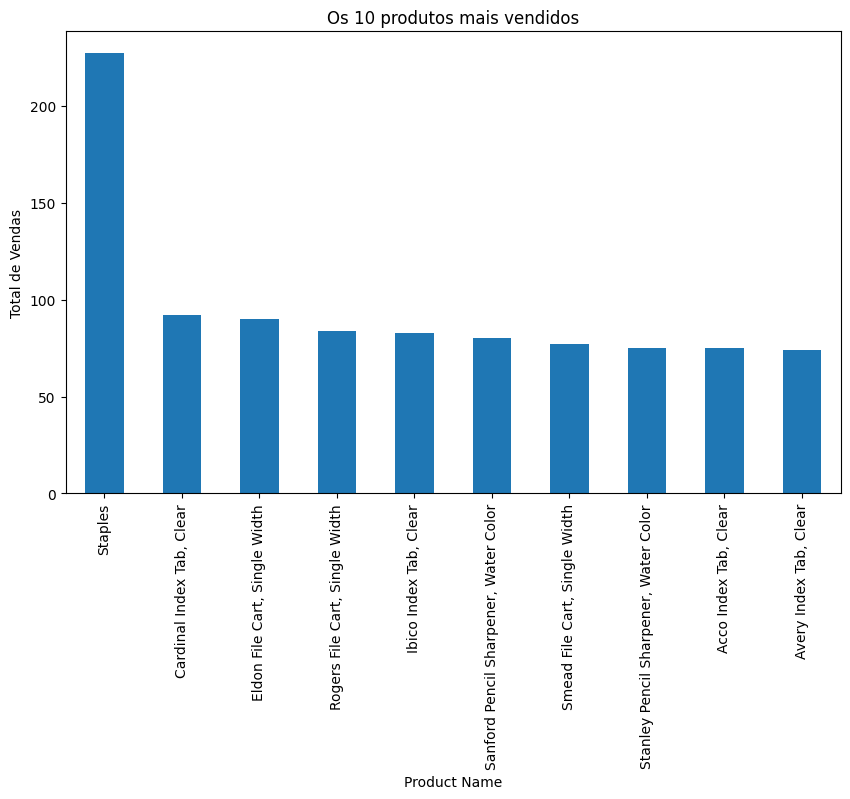

In [59]:
#Gráfico de barra dos produtos que mais venderam

produtos_mais_vendidos = data['Product Name'].value_counts()

produtos_mais_vendidos.head(10).plot(kind='bar', figsize=(10, 6), ylabel='Total de Vendas', title='Os 10 produtos mais vendidos')

<Axes: title={'center': 'Os 10 produtos que geraram mais receita'}, xlabel='Nome do produto', ylabel='Receita'>

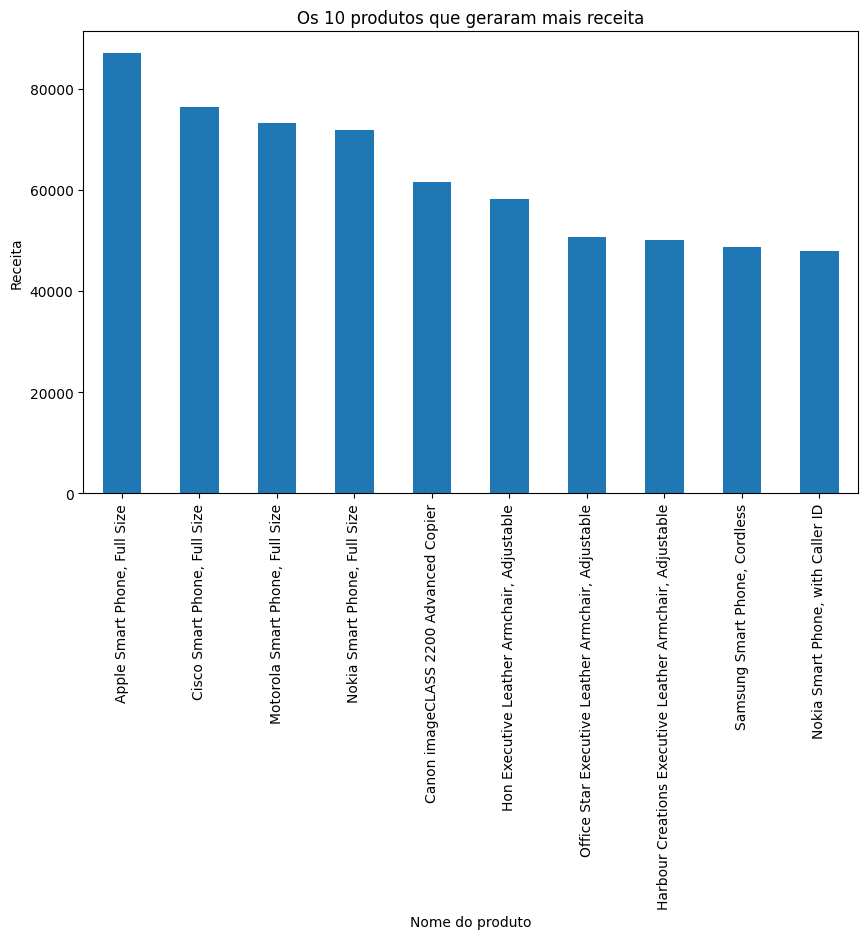

In [105]:
#Gráfico de barra dos produtos que mais geraram receita

venda_por_produto = data.groupby(['Product Name'])['Sales'].sum()

venda_por_produto = venda_por_produto.sort_values(ascending=False)

venda_por_produto.head(10).plot(kind='bar', figsize=(10, 6), xlabel='Nome do produto', ylabel='Receita', title='Os 10 produtos que geraram mais receita')

<Axes: title={'center': 'Os 10 países que geraram mais receita'}, xlabel='País', ylabel='Receita'>

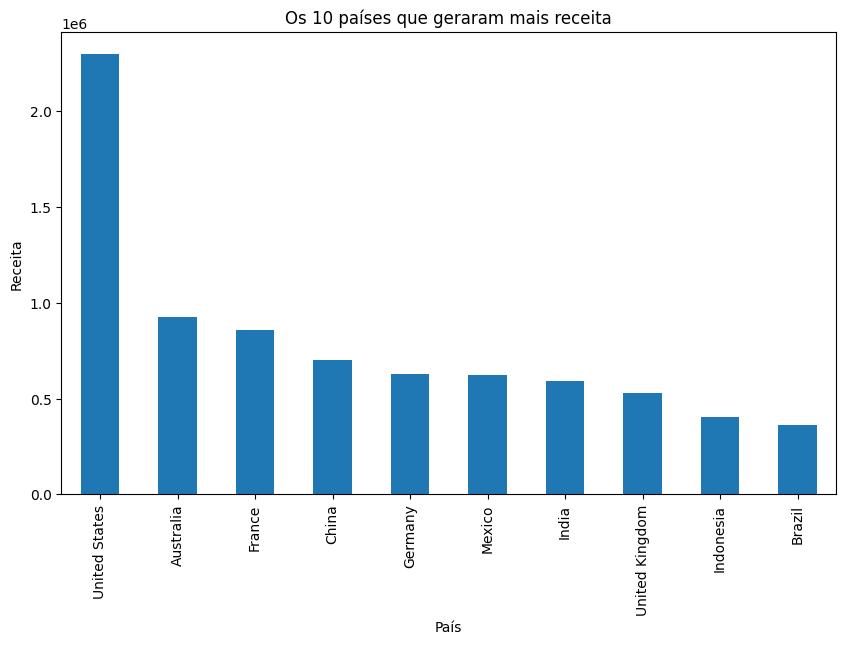

In [106]:
#Gráfico de barra dos países que mais geraram receita

venda_por_pais = data.groupby(['Country'])['Sales'].sum()

venda_por_pais = venda_por_pais.sort_values(ascending=False)

venda_por_pais.head(10).plot(kind='bar', figsize=(10, 6), xlabel='País', ylabel='Receita', title='Os 10 países que geraram mais receita')


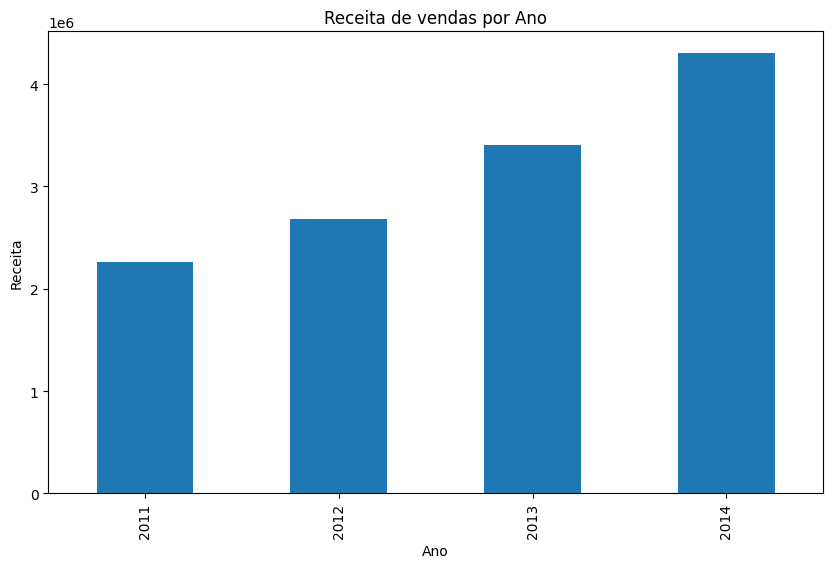

In [62]:
# Extraindo o ano de cada data de pedido
data['Year'] = data['Order Date'].dt.year

# Agrupando as vendas por ano e calculando a soma das vendas
sales_by_year = data.groupby('Year')['Sales'].sum()

# Plotando o gráfico de barras das vendas por ano
sales_by_year.plot(kind='bar', figsize=(10, 6), xlabel='Ano', ylabel='Receita', title='Receita de vendas por Ano')
plt.show()

           Country                                       Product Name  \
50     Afghanistan               Wilson Jones Binder Covers, Recycled   
65         Albania                       StarTech Card Printer, White   
74         Algeria                        Advantus Staples, Bulk Pack   
310         Angola  Hon Legal Exhibit Labels, Laser Printer Compat...   
679      Argentina                          Smead Trays, Single Width   
...            ...                                                ...   
31372    Venezuela             Cardinal Hole Reinforcements, Recycled   
31601      Vietnam                    Harbour Creations Chairmat, Red   
31761        Yemen                Boston Pencil Sharpener, Easy-Erase   
31797       Zambia       Binney & Smith Pencil Sharpener, Water Color   
31921     Zimbabwe        Harbour Creations Rocking Chair, Set of Two   

       Quantity  
50           11  
65           10  
74           12  
310          26  
679          18  
...         ...

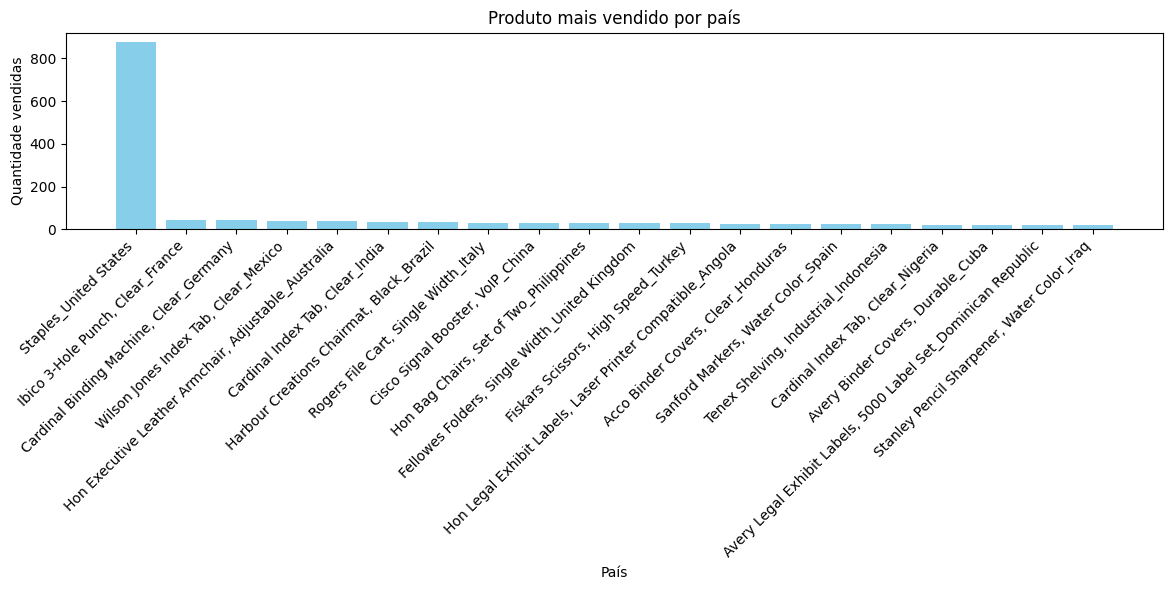

In [63]:
# Agrupando os dados por país e produto e calculando a quantidade vendida de cada produto em cada país
quantidade_venda_por_pais_produto = data.groupby(['Country', 'Product Name'])['Quantity'].sum().reset_index()

# Encontrando o produto mais vendido para cada país
produtos_por_pais = quantidade_venda_por_pais_produto.loc[quantidade_venda_por_pais_produto.groupby('Country')['Quantity'].idxmax()]

# Exibindo o resultado
print(produtos_por_pais)

# Ordenando os dados pelo total de vendas em ordem decrescente
produtos_por_pais = produtos_por_pais.sort_values(by='Quantity', ascending=False)

# Definindo os dados
pais = produtos_por_pais['Country'][:20]
produtos_mais_vendidos = produtos_por_pais['Product Name'][:20]
quantidade = produtos_por_pais['Quantity'][:20]

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(produtos_mais_vendidos+"_"+pais, quantidade, color='skyblue')
plt.xlabel('País')
plt.ylabel('Quantidade vendidas')
plt.title('Produto mais vendido por país')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

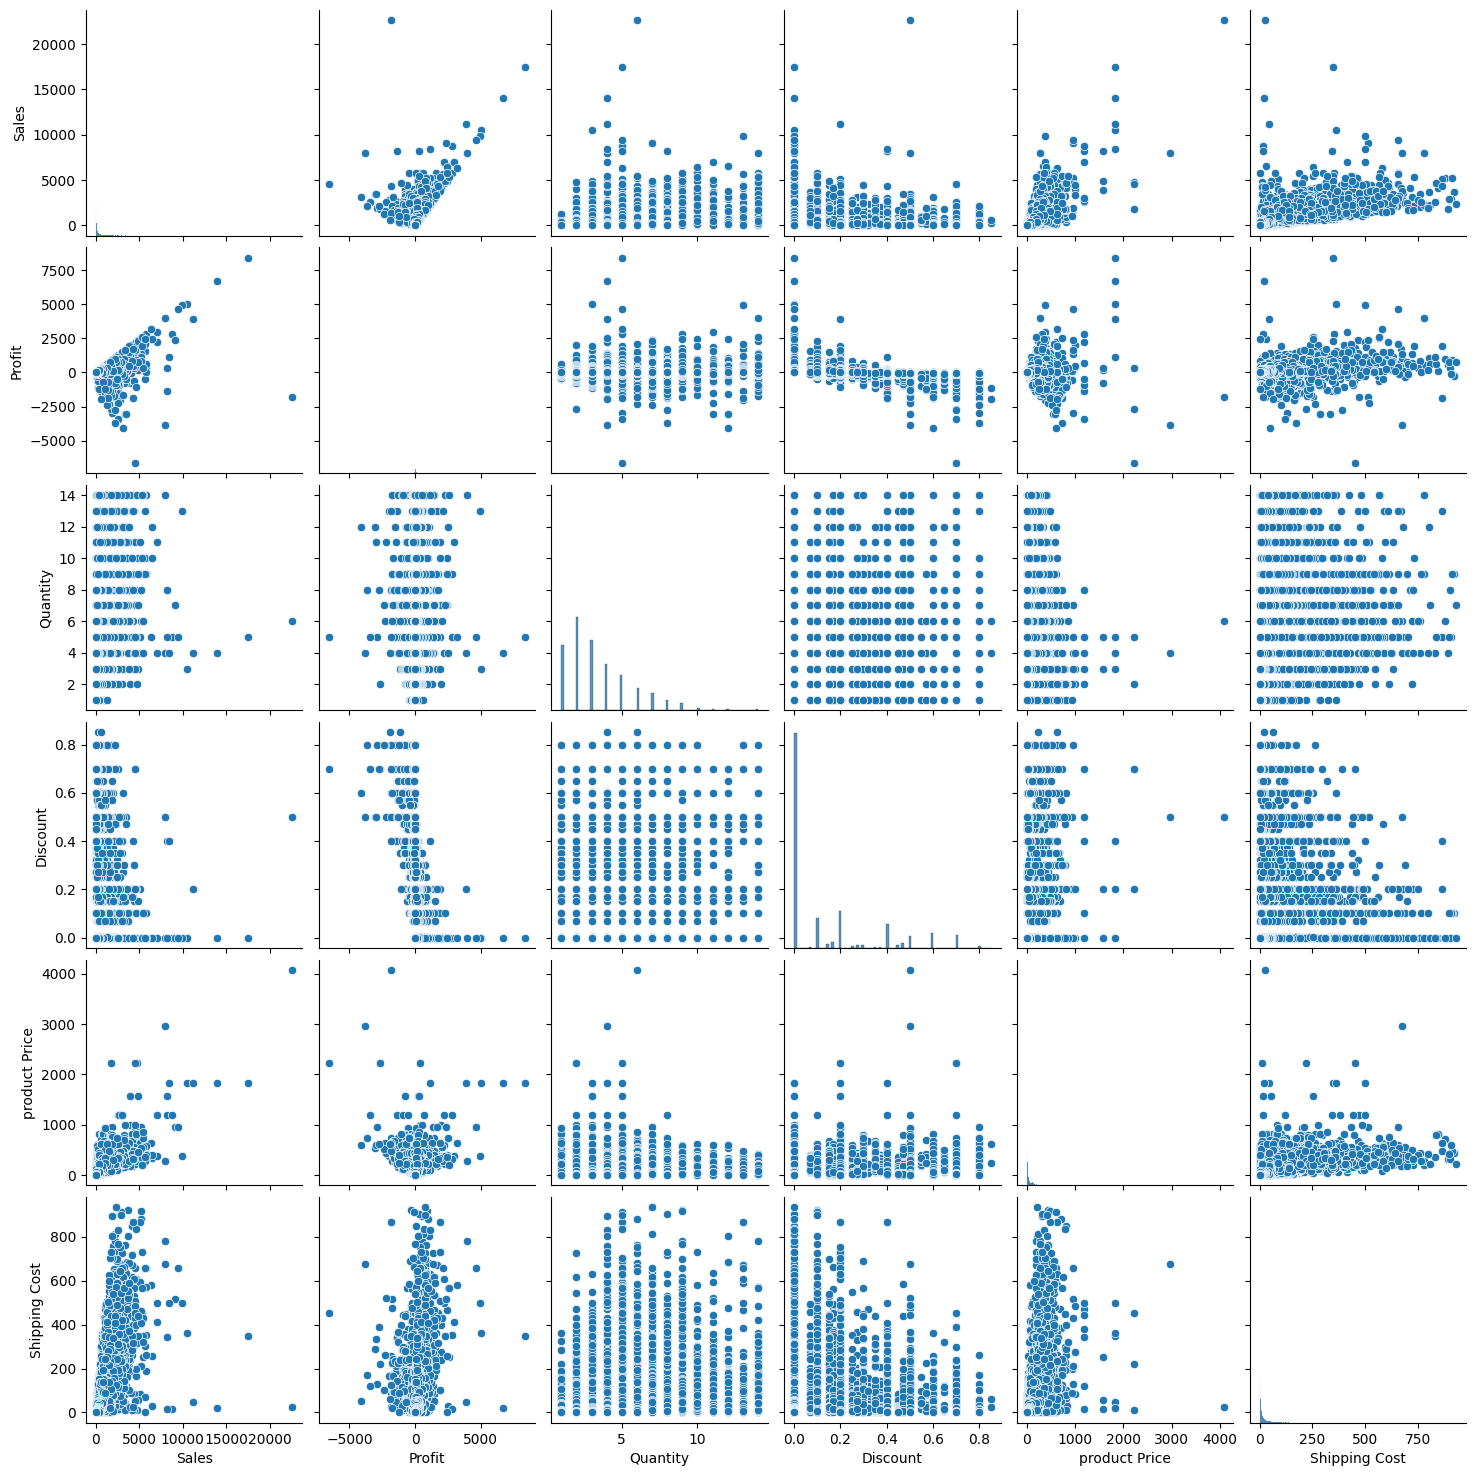

In [64]:
#Cria entidade preço do produto
data['product Price'] = (data['Sales'] - data['Profit'])/data['Quantity']

# Escolha das colunas para a matriz de dispersão
columns = ['Sales', 'Profit', 'Quantity', 'Discount', 'product Price', 'Shipping Cost']

# Plot da matriz de dispersão
sns.pairplot(data[columns])
plt.show()

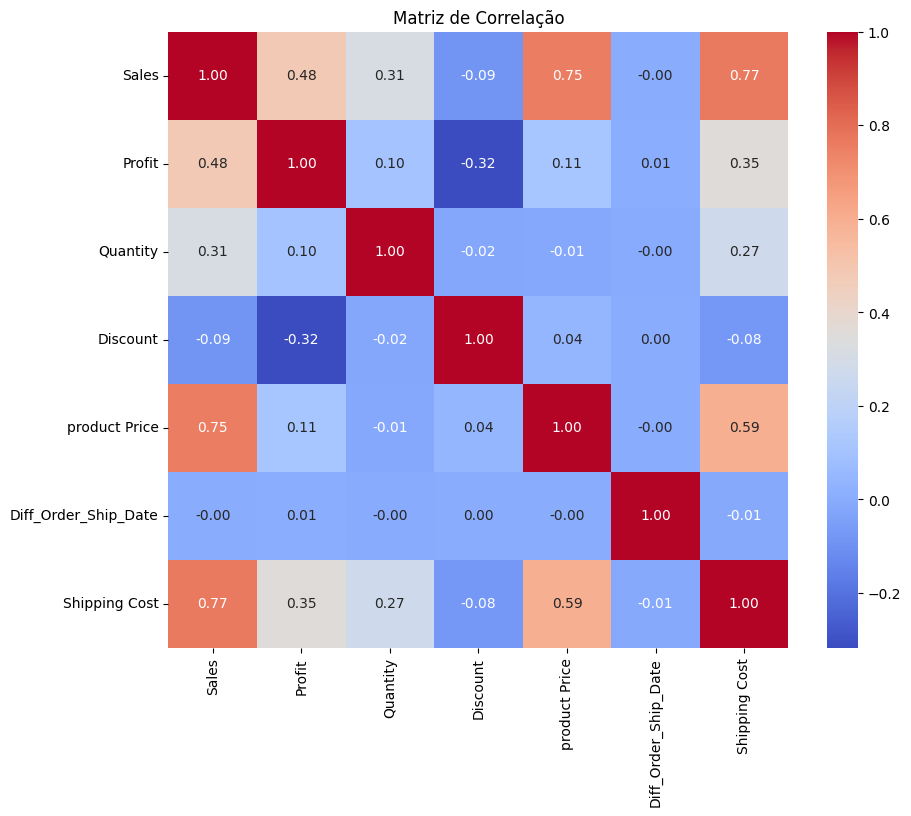

In [65]:
# Calcula a matriz de correlação
correlation_matrix = data[['Sales', 'Profit', 'Quantity', 'Discount', 'product Price', 'Diff_Order_Ship_Date', 'Shipping Cost']].corr()

# Plota um mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [66]:
#Quanto mais próximo de 1 o valor na matriz de confusão, significa que os atributos estão fortemente correlacionadas entre si.
#Quando é zero reflete nenhuma correlação entre os atributos.
#Quando é próximo de -1 significa que os atributos possuem uma relação inversa entre si.

ESSA SEÇÃO É DESTINADA PARA OS DESAFIOS

In [67]:
#Conecta no banco de dados

conn = sqlite3.connect('task_fadesp.db')

In [68]:
#Salva o dataframe gerado pelo dataset, e depois cria uma tabela dentro sqlite chamada dados. Realizada uma check se essa tabela já existe, se existir solicita a substituiçaõ

data.to_sql('dados', conn, if_exists='replace', index=False)

51290

In [69]:
#Fecha a conexção com o BD, para evitar deixar uma conexão aberta.

conn.close()

In [70]:
#Abre a conexão com o BD para realizar consultas na base

conn = sqlite3.connect('task_fadesp.db')

In [71]:
# É usado o pandas para fazer um query na base de dados, utilizando comandos sql

df_query = pd.read_sql_query("SELECT * FROM dados", conn)

In [72]:
df_query

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Diff_Order_Ship_Date,Year,product Price
0,42433,AG-2011-2040,2011-01-01 00:00:00,2011-06-01 00:00:00,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,151,2011,151.0800
1,22253,IN-2011-47883,2011-01-01 00:00:00,2011-08-01 00:00:00,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,212,2011,28.1100
2,48883,HU-2011-1220,2011-01-01 00:00:00,2011-05-01 00:00:00,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,120,2011,9.1200
3,11731,IT-2011-3647632,2011-01-01 00:00:00,2011-05-01 00:00:00,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,120,2011,23.6400
4,22255,IN-2011-47883,2011-01-01 00:00:00,2011-08-01 00:00:00,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,212,2011,15.1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31 00:00:00,2015-04-01 00:00:00,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,91,2014,4.6926
51286,47594,MO-2014-2560,2014-12-31 00:00:00,2015-05-01 00:00:00,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,121,2014,3.5700
51287,8857,MX-2014-110527,2014-12-31 00:00:00,2015-02-01 00:00:00,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,32,2014,4.6800
51288,6852,MX-2014-114783,2014-12-31 00:00:00,2015-06-01 00:00:00,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,152,2014,6.5600


In [73]:
#Aqui pe realizada uma outra consulta utilizando o WHERE, que funciona como "filtro". Realiza um query para quando a coluna Quantity possuir valores menores que 3, sem incluir o três.

df_query = pd.read_sql_query("SELECT * FROM dados WHERE Quantity < 3", conn)

In [74]:
df_query

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Diff_Order_Ship_Date,Year,product Price
0,42433,AG-2011-2040,2011-01-01 00:00:00,2011-06-01 00:00:00,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium,151,2011,151.0800
1,22254,IN-2011-47883,2011-01-01 00:00:00,2011-08-01 00:00:00,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium,212,2011,19.9500
2,21613,IN-2011-30733,2011-01-02 00:00:00,2011-03-02 00:00:00,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,...,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical,59,2011,107.1900
3,34662,CA-2011-115161,2011-01-02 00:00:00,2011-03-02 00:00:00,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,...,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High,59,2011,143.6232
4,44508,AO-2011-1390,2011-01-02 00:00:00,2011-04-02 00:00:00,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,...,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical,90,2011,113.5200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21706,7200,MX-2014-141712,2014-12-31 00:00:00,2014-12-31 00:00:00,Same Day,RB-19465,Rick Bensley,Home Office,Managua,Managua,...,"Smead Box, Industrial",15.000,2,0.00,1.2000,2.34,Critical,0,2014,6.9000
21707,32594,CA-2014-115427,2014-12-31 00:00:00,2015-04-01 00:00:00,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,GBC Binding covers,20.720,2,0.20,6.4750,2.06,Medium,91,2014,7.1225
21708,32593,CA-2014-115427,2014-12-31 00:00:00,2015-04-01 00:00:00,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.20,4.5188,0.89,Medium,91,2014,4.6926
21709,47594,MO-2014-2560,2014-12-31 00:00:00,2015-05-01 00:00:00,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.00,0.4200,0.49,Medium,121,2014,3.5700


In [75]:
#Fecha a conexção com o BD, para evitar deixar uma conexão aberta.

conn.close()

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [77]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Diff_Order_Ship_Date', 'Year',
       'product Price'],
      dtype='object')

In [78]:
#Realizando o pre-processamento para aprendizado de máquina

data_ml = data.loc[:, ['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category','Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'product Price']]

In [79]:
data_ml.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'product Price'],
      dtype='object')

In [80]:
X = data_ml.drop(['Sales'], axis=1).values
y = data_ml['Sales'].values

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [82]:
#Aplicando método de encoder para transformar features categoricas em algo que o modelo de machine learning reconheça

onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14])], remainder='passthrough')

X = onehotencoder.fit_transform(X).toarray()

In [83]:
#Aplicando normalização padrão

scale = StandardScaler()

X = scale.fit_transform(X)

In [84]:
#Separando a base em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=10)

In [85]:
X_treino.shape, y_treino.shape

((41032, 8721), (41032,))

In [86]:
y

array([408.3  , 120.366,  66.12 , ...,  26.4  ,   7.12 ,   3.024])

In [87]:
# Usando o random forest como implementação de modelo de regressão
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state=10, n_jobs=-1)

modelo = rf.fit(X_treino, y_treino)

In [88]:
import pickle

# Salva o modelo em um arquivo usando pickle
with open('randomforest.pkl', 'wb') as arquivo:
    pickle.dump(modelo, arquivo)

In [89]:
y_predito = modelo.predict(X_teste)

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Cálculo do Mean Squared Error (MSE)
mse = mean_squared_error(y_teste, y_predito)

# Cálculo do Mean Absolute Error (MAE)
mae = mean_absolute_error(y_teste, y_predito)

# Cálculo do Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_teste, y_predito)


print("Erro médio quadrático (MSE):", mse)
print("Erro médio absoluto (MAE):", mae)
print("Erro médio absoluto em porcentagem (MAPE):", mape)


Mean Squared Error (MSE): 52362.483234190746
Mean Absolute Error (MAE): 20.37760444761162
Mean Absolute Percentage Error (MAPE): 5.658747684674838


In [101]:
# Usando o Suppoert vector machine como implementação de modelo de regressão

from sklearn.svm import SVR

svm = SVR()

svm_modelo = svm.fit(X_treino, y_treino)

In [102]:
import pickle

# Salva o modelo em um arquivo usando pickle
with open('svm.pkl', 'wb') as arquivo:
    pickle.dump(svm_modelo, arquivo)

In [103]:
y_pred = svm_modelo.predict(X_teste)

In [104]:
# Cálculo do Mean Squared Error (MSE)
mse = mean_squared_error(y_teste, y_pred)

# Cálculo do Mean Absolute Error (MAE)
mae = mean_absolute_error(y_teste, y_pred)

# Cálculo do Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_teste, y_pred)


print("Erro médio quadrático (MSE):", mse)
print("Erro médio absoluto (MAE):", mae)
print("Erro médio absoluto em porcentagem (MAPE):", mape)

Erro médio quadrático (MSE): 341659.6503686696
Erro médio absoluto (MAE): 209.7574312045203
Erro médio absoluto em porcentagem (MAPE): 199.37755739480716


In [ ]:
#Para reduzir o tempo de treinamento, eu poderia ter janelado os dados ou/e usado uma função de seleção de melhores features.